# K-Means Clustering Implementation

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('clustering.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


### Keeping Two Features Only for Clustering

In [3]:
data=data.loc[:,['ApplicantIncome','LoanAmount']]
data.head(2)

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0


In [5]:
X=data.values #convert to numpy array


array([[4.583e+03, 1.280e+02],
       [3.000e+03, 6.600e+01],
       [2.583e+03, 1.200e+02],
       [6.000e+03, 1.410e+02],
       [2.333e+03, 9.500e+01],
       [3.200e+03, 7.000e+01],
       [2.500e+03, 1.090e+02],
       [1.853e+03, 1.140e+02],
       [1.299e+03, 1.700e+01],
       [4.950e+03, 1.250e+02],
       [3.596e+03, 1.000e+02],
       [3.510e+03, 7.600e+01],
       [4.887e+03, 1.330e+02],
       [2.600e+03, 1.150e+02],
       [7.660e+03, 1.040e+02],
       [2.600e+03, 1.160e+02],
       [3.365e+03, 1.120e+02],
       [2.799e+03, 1.220e+02],
       [4.226e+03, 1.100e+02],
       [1.442e+03, 3.500e+01],
       [3.750e+03, 1.200e+02],
       [3.167e+03, 7.400e+01],
       [4.692e+03, 1.060e+02],
       [3.500e+03, 1.140e+02],
       [1.828e+03, 1.000e+02],
       [3.667e+03, 1.440e+02],
       [3.748e+03, 1.100e+02],
       [3.600e+03, 8.000e+01],
       [1.800e+03, 4.700e+01],
       [2.400e+03, 7.500e+01],
       [3.941e+03, 1.340e+02],
       [4.695e+03, 9.600e+01],
       [

### Visualize the Data Points

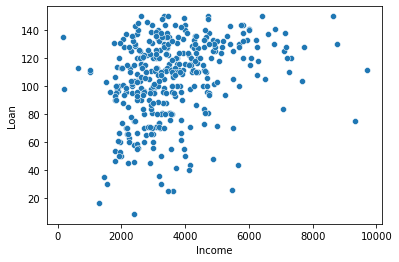

In [6]:
sns.scatterplot(X[:,0],X[:,1])
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

#### Within Cluster Sum of Square- the sum of squared distance between each point and the centroid in a cluster.
- When we plot the WCSS with the K value, the plot looks like an Elbow. 
- As the number of clusters increases, the WCSS value will start to decrease. 
- WCSS value is largest when K = 1.

### Calculate WCSS

In [14]:
def calculate_cost(X,centroids,cluster):
    sum=0;
    for i, val in enumerate(X):
        sum+=np.sqrt((centroids[int(cluster[i]),0]-val[0])**2+(centroids[int(cluster[i]),1]-val[1])**2)
    return sum

### Implement K-means

In [16]:
def kmeans(X,k):
    diff=1
    cluster=np.zeros(X.shape[0])
    centroids=data.sample(n=k).values
    while diff:
        for i,row in enumerate(X):
            mn_dist=float('inf')
            for idx,centroid in enumerate(centroids):
                d=np.sqrt((centroid[0]-row[0])**2+(centroid[1]-row[1])**2)
                
                #store closest centroid
                if mn_dist>d:
                    mn_dist=d
                    cluster[i]=idx
        new_centroids=pd.DataFrame(X).groupby(by=cluster).mean().values
        if np.count_nonzero(centroids-new_centroids)==0:
            diff=0
        else:
            centroids=new_centroids
        
    return centroids, cluster
        
    
            
            
            
            
        

### Find K value using elbow method

In [17]:
cost_list=[]
for k in range(1,10):
    centroids,cluster=kmeans(X,k)
    
    #within cluster sum of square
    
    cost=calculate_cost(X,centroids,cluster)
    cost_list.append(cost)
    
    

### Plot a line plot between WCSS and k

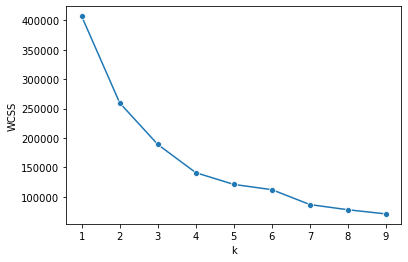

In [18]:
sns.lineplot(x=range(1,10),y=cost_list,marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

### Make clusters

In [19]:
k=4
centroids,cluster=kmeans(X,k)

### Visualize the clusters formed

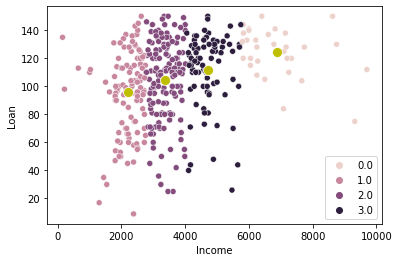

In [20]:
sns.scatterplot(X[:,0],X[:,1],hue=cluster)
sns.scatterplot(centroids[:,0],centroids[:,1],s=100,color='y')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()